# Graduate Project
### CSCI-E7 Spring 2017
#### Due Date: 170503
#### Name: Michelle Gaffney
#### TF: Kaleigh Douglas

In [1]:
#import necessary modules
import random
from IPython.display import Image, display

### A brief introduction to Pokemon

<p>In each main series Pokemon game, the player character builds a team of Pokemon to help them defeat the bad guys and become the greatest Pokemon trainer in the region.  Each Pokemon has one or two (mostly elemental) types and each type has strengths and weaknesses against other types.  Some types are immune to others, but I am ignoring those interactions for the purposes of this exercise.</p> 

<p>As Pokemon battle each other, they gain levels and many Pokemon evolve once or twice into more powerful versions.  Sometimes Pokemon gain or change a type when evolving.</p>

### Part 1: Random team building

<p>Some people find that the games can be less than challenging if you know what you're doing, so some fans will introduce handicaps to make things more interesting.  The "random" module in Python can help with this.

<p>First things first: You need a dictionary of pokemon where the keys are pokemon species and the values are the pokemon's type(s) as a list.  I made the one below myself, but if you're willing to do some filtering/sorting, you could probably find csv files online with pokemon names and import those.  The dictionary below includes only unevolved Pokemon new to the two most recent generations of Pokemon (games Pokemon X and Y and Pokemon Sun and Moon) or Pokemon that do not evolve to keep things simple.  However, I gave each Pokemon the typing of its final evolution to maximize type availability which will come in handy for Part 2.</p>

In [28]:
#dictionary with pokemon:type
pokemon_type = {"chespin": ["grass", "fighting"], "fennekin": ["fire", "psychic"], "froakie": ["water", "dark"], 
                "bunnelby": ["normal", "ground"], "fletchling": ["fire", "flying"], "scatterbug":
                ["bug", "flying"], "litleo": ["fire", "normal"], "flabebe": ["fairy"], "skiddo": ["grass"], 
                "pancham": ["fighting", "dark"], "furfrou": ["normal"], "espurr": ["psychic"], 
                "spritzee": ["fairy"], "swirlix": ["fairy"], "inkay": ["dark", "psychic"], "skrelp": 
                ["poison", "dragon"], "clauncher": ["water"], "helioptile": ["electric", "normal"],
                "tyrunt": ["rock", "dragon"], "amaura": ["rock", "ice"], "hawlucha": ["fighting", "flying"], 
                "dedenne": ["electric", "fairy"], "carbink": ["rock", "fairy"], "goomy": ["dragon"],
                "klefki": ["steel", "fairy"], "phantump": ["ghost", "grass"], "pumpkaboo": ["ghost", "grass"], 
                "bergmite": ["ice"], "noibat": ["flying", "dragon"], "rowlet": ["grass", "ghost"], 
                "litten": ["fire", "dark"] , "popplio": ["water", "fairy"], "sandygast": ["ghost", "ground"],
               "pikipek": ["normal", "flying"], "yungoos": ["normal"], "grubbin": ["bug", "electric"], 
               "crabrawler": ["fighting", "ice"], "cutiefly": ["bug", "fairy"],"rockruff": ["rock"], 
                "wishiwashi": ["water"], "mareanie": ["poison", "water"], "mudbray": ["ground"],
               "dewpider": ["water", "bug"], "fomantis": ["grass"], "morelull": ["grass", "fairy"], "salandit":
               ["poison", "fire"], "stufful": ["normal", "fighting"], "bounsweet": ["grass"], "comfey": ["fairy"],
               "oranguru": ["normal", "psychic"], "passimian": ["fighting"], "wimpod": ["bug", "water"], 
                "pyukumuku": ["water"], "minior": ["rock", "flying"], "komala": ["normal"],
               "turtonator": ["fire", "dragon"], "togedamaru": ["electric", "steel"], "mimikyu": 
                ["ghost", "fairy"], "bruxish": ["water", "psychic"], "drampa": ["normal", "dragon"], "dhelmise":
               ["ghost", "grass"], "jangmo-o": ["dragon", "fighting"], "honedge": ["steel", "ghost"], 
               "binacle": ["rock", "water"]}

<p>The pokemonImage function below matches Pokemon with their National Dex number (in-universe enumeration) and uses that information to display an image of the Pokemon.  This function will make the results of the team-building functions below look more interesting by importing images of each Pokemon on the team.</p>

In [221]:
pokemon_dex = {"chespin": "650", "fennekin": "653", "froakie": "656", 
                "bunnelby": "659", "fletchling": "661", "scatterbug":
                "664", "litleo": "667", "flabebe": "669", "skiddo": "672", 
                "pancham": "674", "furfrou": "676", "espurr": "677", 
                "spritzee": "682", "swirlix": "684", "inkay": "686", "skrelp": 
                "690", "clauncher": "692", "helioptile": "694",
                "tyrunt": "696", "amaura": "698", "hawlucha": "701", 
                "dedenne": "702", "carbink": "703", "goomy": "704",
                "klefki": "707", "phantump": "708", "pumpkaboo": "710", 
                "bergmite": "712", "noibat": "714", "rowlet": "722", 
                "litten": "725", "popplio": "728", "sandygast": "769",
               "pikipek": "731", "yungoos": "734", "grubbin": "737", 
               "crabrawler": "739", "cutiefly": "742","rockruff": "744", 
                "wishiwashi": "746", "mareanie": "747", "mudbray": "749",
               "dewpider": "751", "fomantis": "753", "morelull": "755", "salandit":
               "757", "stufful": "759", "bounsweet": "761", "comfey": "764",
               "oranguru": "765", "passimian": "766", "wimpod": "767", 
                "pyukumuku": "771", "minior": "774", "komala": "775",
               "turtonator": "776", "togedamaru": "777", "mimikyu": 
                "778", "bruxish": "779", "drampa": "780", "dhelmise":
               "781", "jangmo-o": "782", "honedge": "679", 
               "binacle": "688"}

def pokemonImage(team):
    """Takes group of Pokemon (can be any iterable) and displays their names, types, and pictures."""
    #iterate through Pokemon in input team
    for pokemon in team:
        #insert National Dex number into the URL to display the Pokemon's image
        image = Image("http://www.serebii.net/sunmoon/pokemon/" + pokemon_dex[pokemon] + ".png")
        print(pokemon, pokemon_type[pokemon])
        display(image)

<p>Now we write a function, randomPokemon(a).  This function will take the above dictionary (or any dictionary you create that meets the correct format) and return a dictionary that includes six unique pokemon with no overlapping types.  The function will pick a random Pokemon from the input dictionary using the "choice" function from the "random" module and add that Pokemon to the results dictionary as long as there is not already a Pokemon of that type in the results dictionary.</p>

Your team is: 

chespin ['grass', 'fighting']


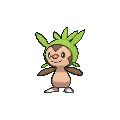

honedge ['steel', 'ghost']


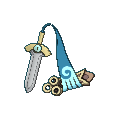

bunnelby ['normal', 'ground']


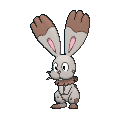

bruxish ['water', 'psychic']


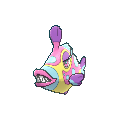

grubbin ['bug', 'electric']


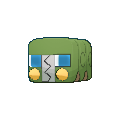

litten ['fire', 'dark']


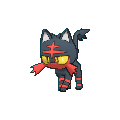

In [233]:
def randomPokemon(pokemon_dict):
    """
    Takes dictionary 'a' in format pokemon:[types] and returns dictionary containing six pokemon with no
    overlapping types.
    """
    #create empty dictionary to hold results and empty list to hold discarded items
    results = {}
    discard = []
    #while loop will repeat until results dictionary has six Pokemon
    while len(results) < 6:
        #pick random Pokemon from dictionary and store in variable "entry"
        entry = random.choice(list(pokemon_dict))
        #compare the types of the selected Pokemon with the types of Pokemon already in the results dictionary
        for item in list(results.values()):
            for typing in item:
                for item1 in pokemon_dict[entry]:
                    #if any of the types match, the Pokemon will go into the discard list
                    if typing == item1:
                        discard.append(entry)
        #if the Pokemon is not in the discard list (meaning it does not match any of the types already in results),
        #it is is added to the results dictionary
        if entry not in discard:
            results[entry] = pokemon_dict[entry]
    #need to return the results dictionary so it will be available outside the function
    return results

#call the function using the pokemon_type dictionary as the argument
team1 = randomPokemon(pokemon_type)

#display team using pokemon_image function
print("Your team is: " + "\n")
pokemonImage(team1)

<p>As you can see above, we have a list of six random Pokemon with no overlapping types.  They are certainly not the team I would normally use, so I have definitely succeeded in giving myself a challenge.</p>

### Part 2: Tailoring your team

<p>So, we can make a random team, but what if we want a team that is a little more useful for the game at hand?  Traditionally, each Pokemon game includes eight Pokemon Gyms where a Gym Leader who specializes in a particular Pokemon type must be defeated.  We can write a function, teamSelection(gym_list) to create a more tailored team.

<p>Before we can use teamSelection(gym_list), we will need two more dictionaries: type_pokemon, which has Pokemon types as keys and Pokemon species as values, and super_effective where each key is a Pokemon type and its value is a list of Pokemon types that are strong against the key.</p>

<p>To create the type_pokemon dictionary, I will reuse some code I wrote for a homework assignment.  The function below, switchDict(dict1), takes a dictionary and returns a dictionary where the keys and values have been switched.  Since keys must be unique, it checks to see if the key already exists and, if so, adds the new value on to the existing values list.</p>

In [60]:
def switchDict(dict1):
    """Returns dict where keys and values of dict1 are switched."""
    #empty dict to store results
    dict2 = {}
    
    #iterate through keys
    for key in dict1:
        for item in dict1[key]:
            #if value already exists as key in dict2, append key as part of already existing value
            if item in dict2:
                dict2[item].append(key) 
            #otherwise, add new key:value pair where value is a list
            else:
                dict2[item] = [key]
    return dict2
    
type_pokemon = switchDict(pokemon_type)

In [64]:
#Now we have a dictionary where Pokemon type is the key and a list of corresponding Pokemon is the value
for item in type_pokemon:
    print(item, type_pokemon[item])

grass ['morelull', 'pumpkaboo', 'rowlet', 'bounsweet', 'dhelmise', 'phantump', 'chespin', 'skiddo', 'fomantis']
poison ['skrelp', 'salandit', 'mareanie']
steel ['klefki', 'honedge', 'togedamaru']
psychic ['inkay', 'espurr', 'oranguru', 'fennekin', 'bruxish']
water ['pyukumuku', 'binacle', 'popplio', 'froakie', 'wimpod', 'clauncher', 'dewpider', 'bruxish', 'mareanie', 'wishiwashi']
rock ['amaura', 'binacle', 'minior', 'rockruff', 'carbink', 'tyrunt']
bug ['grubbin', 'wimpod', 'scatterbug', 'dewpider', 'cutiefly']
normal ['pikipek', 'furfrou', 'helioptile', 'stufful', 'drampa', 'yungoos', 'komala', 'bunnelby', 'oranguru', 'litleo']
dragon ['turtonator', 'skrelp', 'jangmo-o', 'drampa', 'goomy', 'noibat', 'tyrunt']
fighting ['jangmo-o', 'stufful', 'passimian', 'hawlucha', 'chespin', 'crabrawler', 'pancham']
electric ['helioptile', 'grubbin', 'dedenne', 'togedamaru']
flying ['pikipek', 'minior', 'fletchling', 'scatterbug', 'hawlucha', 'noibat']
fire ['turtonator', 'litten', 'salandit', 'fle

<p>Now to create super_effective dictionary.  Again, you can probably find this data is an importable format on the internet if you so choose.</p>

In [74]:
super_effective = {"normal": ["fighting"], "fighting": ["flying", "psychic", "fairy"],
                  "flying": ["rock", "electric", "ice"], "poison": ["ground", "psychic"],
                  "ground": ["water", "grass", "ice"], "rock": 
                   ["fighting", "ground", "steel", "water", "grass"], "bug": ["flying", "rock", "fire"],
                  "ghost": ["ghost", "dark"], "steel": ["fighting", "ground", "fire"],
                  "fire": ["ground", "rock", "water"], "water": ["grass", "electric"], "grass":
                  ["flying", "poison", "bug", "fire", "ice"], "electric": ["ground"], "psychic":
                  ["ghost", "dark", "bug"], "ice": ["fighting", "rock", "steel", "fire"], "dragon":
                  ["fairy", "dragon", "ice"], "dark": ["fighting", "bug", "fairy"], "fairy":
                  ["poison", "steel"]}

In [69]:
#below are two lists to use when testing the teamSelection function

kalos_gyms = ["bug", "rock", "fighting", "grass", "electric", "fairy", "psychic", "ice"]
kanto_gyms = ["rock", "water", "electric", "grass", "poison", "psychic", "fire", "ground"]

<p>We are now ready to write teamSelection(gym_list), which takes a list of Pokemon Gym types, and returns a team of Pokemon with the necessary type advantages.  This function sorts gym types by fewest to most weaknesses and checks to see if the requested type already exists in the results1 dictionary so you will likely end up with a resulting dictionary where one Pokemon is providing type advantages for multiple gym leaders.  However, the scope of this project does not include strictly limiting the results to six Pokemon since you can change Pokemon throughout the game and I find it more interesting to play with as many Pokemon as possible.  In fact, you could have some fun playing around with the randomPokemon function above to adjust the size of the resulting Pokemon team.</p>

[{'electric': ['ground']}, {'fairy': ['poison', 'steel']}, {'fighting': ['flying', 'psychic', 'fairy']}, {'psychic': ['ghost', 'dark', 'bug']}, {'bug': ['flying', 'rock', 'fire']}, {'ice': ['fighting', 'rock', 'steel', 'fire']}, {'grass': ['flying', 'poison', 'bug', 'fire', 'ice']}, {'rock': ['fighting', 'ground', 'steel', 'water', 'grass']}]
Your team is: 

sandygast ['ghost', 'ground']


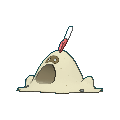

carbink ['rock', 'fairy']


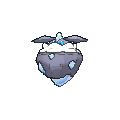

skrelp ['poison', 'dragon']


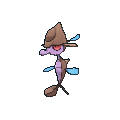

{'sandygast': ['ghost', 'ground'], 'carbink': ['rock', 'fairy'], 'skrelp': ['poison', 'dragon']}


In [235]:
def teamSelection(gym_list):
    """Takes list of gym types and produces dictionary of pokemon with type advantages."""
    #empty dictionary for results
    results1 = {}
    
    #empty list to store values during function
    match = []
    
    #empty dictionary to use to pull in type:supereffective types data for each gym in gym_list
    gyms = {}

    #version of sorted gyms sorted by len of values, shortest to longest
    sorted_gyms = []

    #create dictionary containing gym type:supereffective types for input gym_list
    for gym in gym_list:
        gyms[gym] = super_effective[gym]

    #turn gyms dictionary into sorted_gyms list of dictionaries
    for k in sorted(gyms, key=lambda k: len(gyms[k])):
        sorted_gyms.append({k: gyms[k]})
    print(sorted_gyms)
    
    #iterate through each gym type:supereffective types dictionary in sorted_gyms
    for sub_dict in sorted_gyms:
        for key in sub_dict:
            #check to see if any of the supereffective types are already in the results1 dictionary
            for value in sub_dict[key]:
                for item in list(results1.values()):
                    #if there's a match, add type to match list
                    if value in item:
                        match.append(value)
            #if there are no matches, pick a random supereffective type and a random corresponding Pokemon
            #add that Pokemon to the results1 dictionary
            if len(match) == 0:
                chosen_type = random.choice(sub_dict[key])
                chosen_pokemon = random.choice(type_pokemon[chosen_type])
                results1[chosen_pokemon] = pokemon_type[chosen_pokemon]
            #empty the match list at the end of each loop
            match = []
    #return results so they can be accessed outside the function
    return results1

#call the function using one of the gym lists
team2 = teamSelection(kalos_gyms)

#display pokemon names, types, and images using pokemon_image function
print("Your team is: " + "\n")
pokemonImage(team2)

#print team dictionary
print(team2)

In [127]:
kalos_gyms = ["bug", "rock", "fighting", "grass", "electric", "fairy", "psychic", "ice"]
kanto_gyms = ["rock", "water", "electric", "grass", "poison", "psychic", "fire", "ground"]

<p>Using teamSelection, most resulting teams consist of fewer than six Pokemon, so the function is pretty efficient in turning out a team where each Pokemon is providing coverage for multiple opposing types.  This function could result in a team with overlapping types, but only if at least one of the Pokemon sharing a type is also providing additional type coverage with its secondary type.  In the several dozen (at least!) times I ran this function, type overlap only happened a couple of times.</p>